<a href="https://colab.research.google.com/github/Gopizone/DS/blob/main/Ridge_Regularization_(NewspaperData).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files 
files=files.upload()

Saving NewspaperData.csv to NewspaperData.csv


In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression


In [41]:
data = pd.read_csv("NewspaperData.csv")
data


,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [49]:
# input 
X = pd.DataFrame(data['daily'])

#output 
Y = pd.DataFrame(data['sunday'])

In [50]:
X

,daily
0,391.952
1,516.981
2,355.628
3,238.555
4,537.780
5,733.775
6,198.832
7,252.624
8,206.204
9,231.177


In [51]:
Y

,sunday
0,488.506
1,798.298
2,235.084
3,299.451
4,559.093
5,1133.249
6,348.744
7,417.779
8,344.522
9,323.084


In [52]:
#Splitting data into Train and Test
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.10,random_state=0)

(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

((30, 1), (30, 1), (4, 1), (4, 1))

In [53]:
y_train

,sunday
2,235.084
26,262.048
31,267.781
16,324.241
10,620.752
33,1165.567
30,585.681
24,440.923
15,685.975
8,344.522


In [54]:
# Apply Linear Regression Model 
from sklearn.linear_model import LinearRegression
lreg = LinearRegression() 
lreg.fit(x_train, y_train) 

# Generate Prediction on test set 
lreg_y_pred = lreg.predict(x_test) 
pred_train=lreg.predict(x_train)


In [55]:
# calculating Mean Squared Error (mse) for Test Data
mean_squared_error = np.mean((lreg_y_pred - y_test)**2) 
print("Mean squared Error on test set : ", mean_squared_error) 

# calculating Mean Squared Error (mse) for Train Data
mean_squared_error1 = np.mean((pred_train - y_train)**2) 
print("Mean squared Error on train set : ", mean_squared_error1)

Mean squared Error on test set :  sunday    2152.479825
dtype: float64
Mean squared Error on train set :  sunday    12502.793065
dtype: float64


In [59]:
# Putting together the coefficient and their corrsponding variable names 
lreg_coefficient = pd.DataFrame() 
lreg_coefficient["Columns"] = x_train.columns 
lreg_coefficient['Coefficient Estimate'] = pd.DataFrame(lreg.coef_) 
lreg_coefficient


,Columns,Coefficient Estimate
0,daily,1.349754


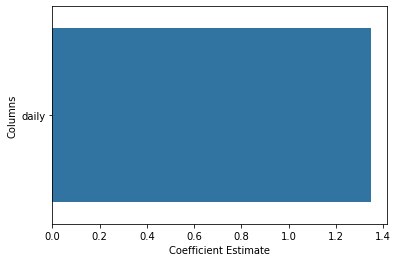

In [61]:
import seaborn as sns

sns.barplot(x='Coefficient Estimate' , y='Columns', data=lreg_coefficient)

In [65]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge 

# Train the model 
ridgeR = Ridge(alpha = 1) 
ridgeR.fit(x_train, y_train) 
y_pred = ridgeR.predict(x_test) 

# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge) 

# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= x_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.DataFrame(ridgeR.coef_) 
ridge_coefficient

sunday    2152.472537
dtype: float64


,Columns,Coefficient Estimate
0,daily,1.349754


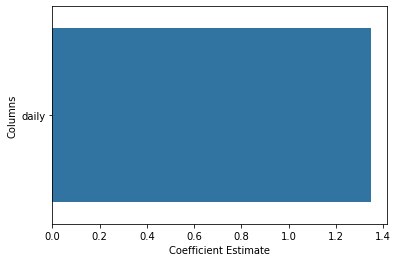

In [66]:
sns.barplot(x='Coefficient Estimate' , y='Columns', data=ridge_coefficient)